# Data examination

In a first step we present a concise overview table over the correlation lenght data.

In [22]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")

bin_size <- 16

d <- results[, c("index", "t", "temp", "comptype")]
colnames(d) <- c("index", "L", "temp", "info")

corr12 <- c()
corr12_err <- c()
for (index in d$index) {
	len <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_len.csv", sep = ""), header = TRUE, sep = ",")
	corr12 <- append(corr12, len$corr12[len$bin_size == bin_size])
	corr12_err <- append(corr12_err, len$corr12_err[len$bin_size == bin_size])
}
d$corr12 <- corr12
d$corr12_err <- corr12_err
d$corr12_err_perc <- d$corr12_err / d$corr12

comp <- d

comp[d$L == 16, ]
comp[d$L == 24, ]
comp[d$L == 36, ]
comp[d$L == 54, ]

,index,L,temp,info,corr12,corr12_err,corr12_err_perc
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
8,3007,16,0.26,100 Metropolis Simulations,12.09608,0.6067228,0.05015863


,index,L,temp,info,corr12,corr12_err,corr12_err_perc
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,3000,24,0.270,1 Metropolis Simulations,6.212154,1.0308724,0.16594445
2,3001,24,0.275,1 Metropolis Simulations,62.715520,114.4566361,1.82501296
3,3002,24,0.280,1 Metropolis Simulations,5.161464,0.8586765,0.16636298
4,3003,24,0.285,1 Metropolis Simulations,5.831237,0.9082822,0.15576150
5,3004,24,0.290,1 Metropolis Simulations,9.855200,3.3933082,0.34431653
6,3005,24,0.295,1 Metropolis Simulations,4.415328,0.6169789,0.13973570
7,3006,24,0.300,1 Metropolis Simulations,4.733250,0.7093981,0.14987547
9,3107,24,0.260,100 Metropolis Simulations,9.390834,0.2012568,0.02143119


index,L,temp,info,corr12,corr12_err,corr12_err_perc
<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>


index,L,temp,info,corr12,corr12_err,corr12_err_perc
<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>


## Compounded correlation lengths

Warning message in min(x):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"
Warning message in max(x):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"


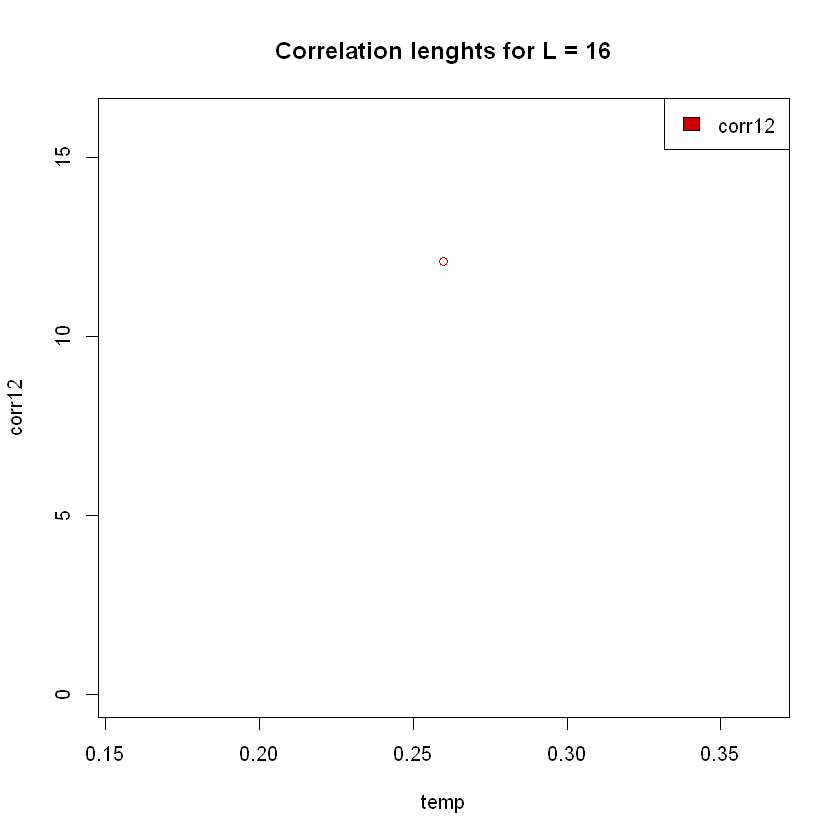

ERROR: Error in plot.window(...): endliche 'xlim' Werte nötig


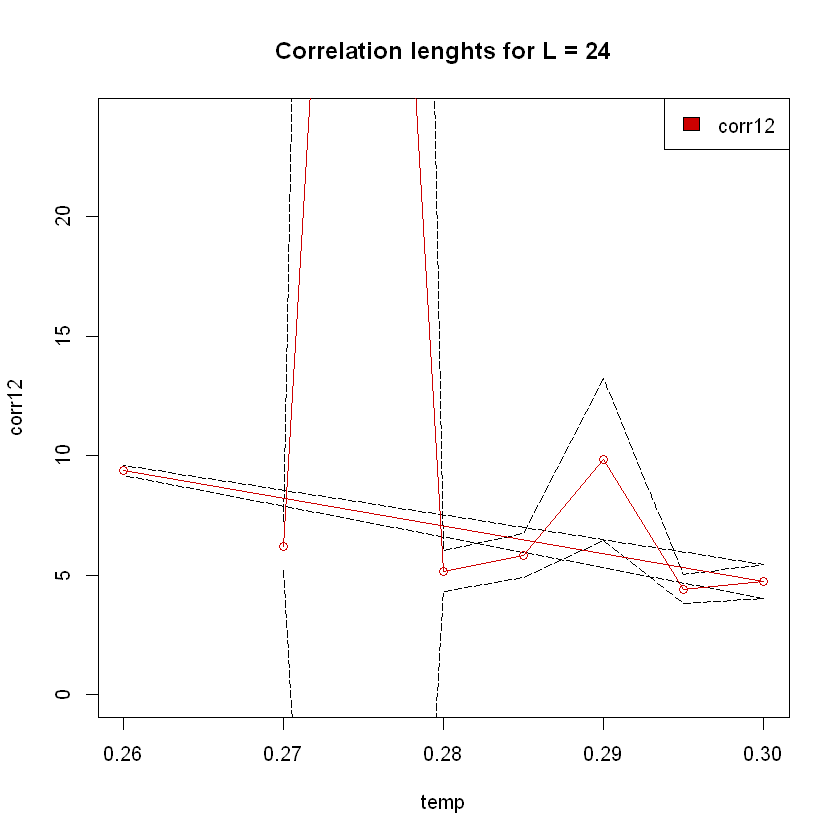

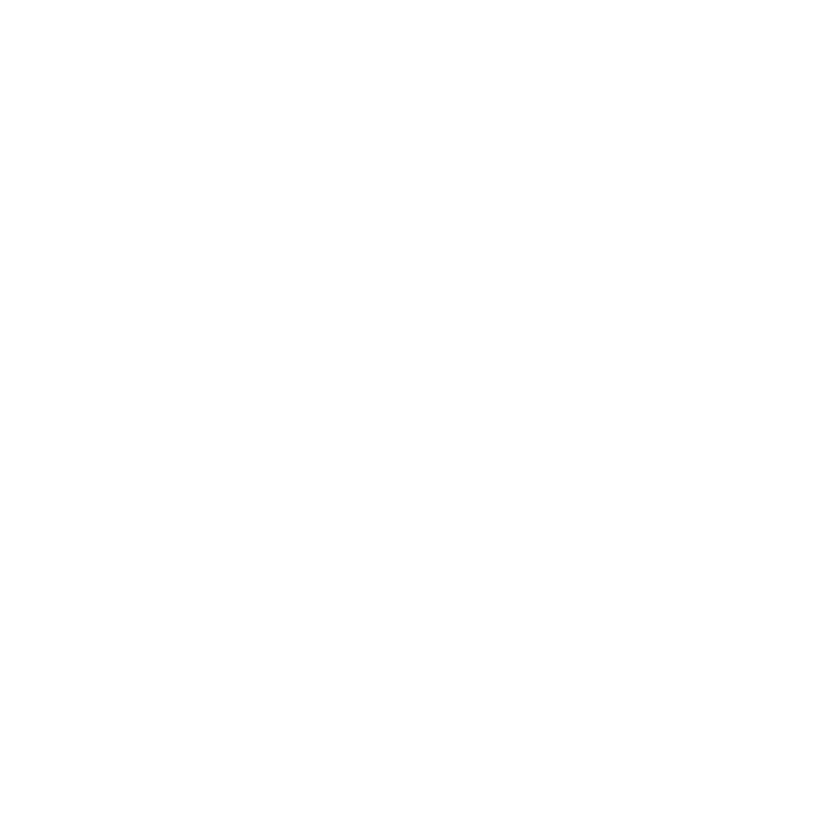

In [23]:
for (size in c(16, 24, 36, 54, 81)) {
	d <- comp[comp$L == size, c("L", "temp", "corr12", "corr12_err")]
	plot(corr12 ~ temp, data = d, ylim = c(0, size), col = "red3", type = "o")
	upper <- d$corr12 + d$corr12_err
	lower <- d$corr12 - d$corr12_err
	lines(d$temp, upper, lty = 5)
	lines(d$temp, lower, lty = 5)
	points(corr12 ~ temp, data = d, col = "red3")
	lines(corr12 ~ temp, data = d, col = "red3")
	title(paste("Correlation lenghts for L =", size))
	legend <- list(names = c("corr12"), cols = "red3")
	legend("topright", y = legend$names, fill = legend$cols)
}

## Step-scaling functions

Here we plot the step-scaling functions $\xi (1.5 L) / \xi (L) \sim \xi(L) / L$. In a first step, we only utilize the correlation lenghts `corr12`, that only considers the first and second non-zero momentum modes.

,index,L,temp,corr12,corr12_err,corr_beta_ratio,corr_beta_ratio_err,corr12_15,corr12_15_err,corr_step_ratio,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,8,16,0.260,11.090432,1.5275387,0.6931520,0.095471167,9.000052,0.5881925,0.8115150,0.16480991
10,9,16,0.265,10.213968,1.1151653,0.6383730,0.069697831,8.476854,0.5261112,0.8299276,0.14212084
11,10,16,0.270,8.708709,0.7422042,0.5442943,0.046387765,7.343437,0.3785524,0.8432292,0.11533291
12,11,16,0.275,8.174114,0.4385897,0.5108821,0.027411856,6.547389,0.2934239,0.8009907,0.07887462
13,12,16,0.280,6.732614,0.3583975,0.4207884,0.022399843,6.153471,0.2437017,0.9139794,0.08485109
14,13,16,0.285,6.735781,0.3470733,0.4209863,0.021692080,5.473172,0.1822939,0.8125520,0.06893173
15,14,16,0.290,5.259971,0.1848864,0.3287482,0.011555401,5.145880,0.1537751,0.9783096,0.06362227
16,15,16,0.295,5.020839,0.1788223,0.3138024,0.011176392,4.869496,0.1301824,0.9698570,0.06047085
17,16,16,0.300,4.700274,0.1501783,0.2937671,0.009386145,4.506933,0.1199698,0.9588660,0.05616070


,index,L,temp,corr12,corr12_err,corr_beta_ratio,corr_beta_ratio_err,corr12_15,corr12_15_err,corr_step_ratio,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,174,24,0.240,17.607831,4.1306507,0.7336596,0.172110446,13.876143,2.4688152,0.7880666,0.32508508
23,175,24,0.245,14.139979,1.8418745,0.5891658,0.076744770,11.953834,1.4715124,0.8453927,0.21418842
24,176,24,0.250,11.056278,1.0220157,0.4606782,0.042583986,10.701097,1.0653216,0.9678752,0.18582250
25,177,24,0.255,10.381358,0.9279298,0.4325566,0.038663740,9.311278,0.8462247,0.8969229,0.16168463
26,178,24,0.260,9.000052,0.5881925,0.3750022,0.024508023,9.270131,0.7717087,1.0300086,0.15306045
27,179,24,0.265,8.476854,0.5261112,0.3532023,0.021921302,8.801551,0.6854891,1.0383040,0.14530773
28,180,24,0.270,7.343437,0.3785524,0.3059765,0.015773018,7.819577,0.4409857,1.0648388,0.11494387
29,181,24,0.275,6.547389,0.2934239,0.2728079,0.012225996,6.377185,0.3537858,0.9740043,0.09768504
30,182,24,0.280,6.153471,0.2437017,0.2563946,0.010154238,5.919467,0.4515741,0.9619720,0.11148315


,index,L,temp,corr12,corr12_err,corr_beta_ratio,corr_beta_ratio_err,corr12_15,corr12_15_err,corr_step_ratio,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,340,36,0.220,23.240944,9.0753511,0.6455818,0.252093087,25.413975,5.9466436,1.0935002,0.6828699
36,341,36,0.225,21.211306,7.1037137,0.5892029,0.197325379,18.101672,2.7251114,0.8533974,0.4142792
37,342,36,0.230,14.146517,2.6681987,0.3929588,0.074116632,17.276167,2.2751720,1.2212311,0.3911676
38,343,36,0.235,12.852175,1.8596700,0.3570049,0.051657501,13.339291,1.1127027,1.0379014,0.2367581
39,344,36,0.240,13.876143,2.4688152,0.3854484,0.068578200,12.894580,1.0735116,0.9292625,0.2426963
40,345,36,0.245,11.953834,1.4715124,0.3320510,0.040875345,11.045905,0.6364309,0.9240470,0.1669906
41,346,36,0.250,10.701097,1.0653216,0.2972527,0.029592268,10.675451,0.7768058,0.9976034,0.1719052
42,347,36,0.255,9.311278,0.8462247,0.2586466,0.023506241,9.053257,0.5267652,0.9722895,0.1449361
43,348,36,0.260,9.270131,0.7717087,0.2575036,0.021436352,8.665239,0.6708856,0.9347482,0.1501855


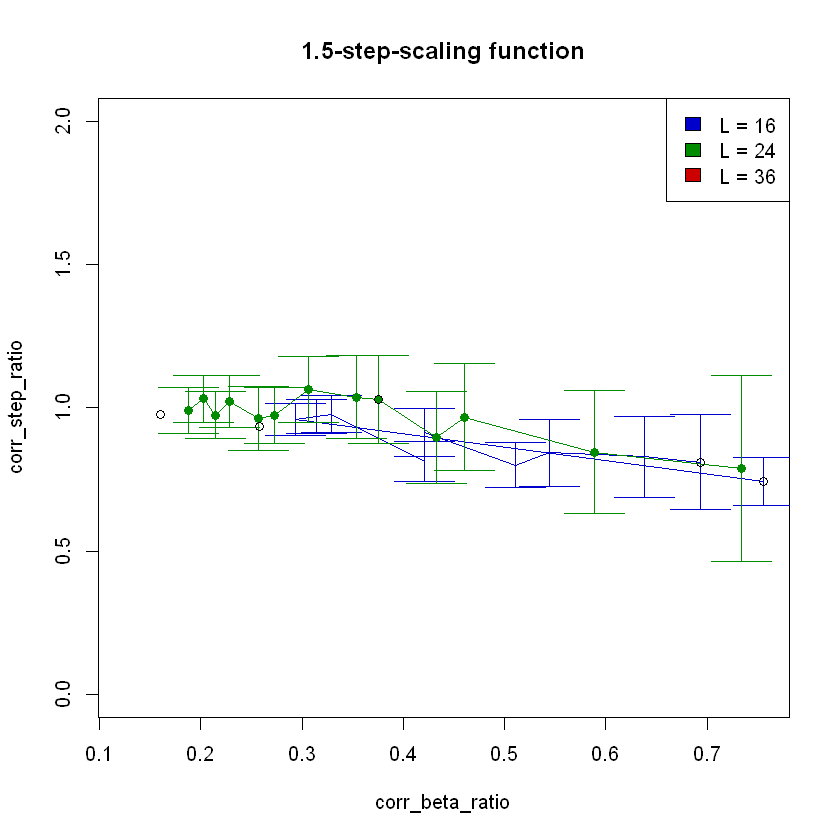

In [ ]:
# Loading data
d <- comp[, c("index", "L", "temp", "corr12", "corr12_err")]

# Building the x and y axis data
d$corr_beta_ratio <- d$corr12 / d$L
d$corr_beta_ratio_err <- d$corr12_err / d$L
d$corr12_15 <- 0
d$corr12_15_err <- 0
for (i in 1:nrow(d)) {
	my_temp <- d$temp[i]
	next_size <- d$L[i] * 3 / 2
	d$corr12_15[i] <- ifelse(next_size %in% d$L,
		ifelse(my_temp %in% d$temp[d$L == next_size],
		d$corr12[d$temp == my_temp & d$L == next_size][1], 0), 0)
	d$corr12_15_err[i] <- ifelse(next_size %in% d$L,
		ifelse(my_temp %in% d$temp[d$L == next_size],
		d$corr12_err[d$temp == my_temp & d$L == next_size][1], 0), 0)
}
d <- d[d$corr12_15 != 0, ]
d$corr_step_ratio <- d$corr12_15 / d$corr12
d$corr_step_ratio_err <- d$corr12_err * abs(d$corr12_15 / (d$corr12 * d$corr12) )
d$corr_step_ratio_err <- d$corr_step_ratio_err + d$corr12_15_err / abs(d$corr12)

d <- d[d$corr12 <= d$L, ]

d16 <- d[d$L == 16, ]
d24 <- d[d$L == 24, ]
d36 <- d[d$L == 36, ]

#d16 <- d16[d16$temp >= 0.26 & d16$temp <= 0.40, ]
#d24 <- d24[d24$temp >= 0.24 & d24$temp <= 0.37, ]
#d36 <- d36[d36$temp >= 0.23 & d36$temp <= 0.31, ]

d16
d24
d36

dat <- rbind(d16, d24, d36)

plot(
	corr_step_ratio ~ corr_beta_ratio,
	data = d16,
	col = "blue3",
	type = "l",
	pch = 19,
	xlim = c(min(dat$corr_beta_ratio), max(dat$corr_beta_ratio)),
	#ylim = c(min(dat$corr_step_ratio), max(dat$corr_step_ratio))
	ylim = c(0, 2)
)
if(TRUE) arrows(d16$corr_beta_ratio,
	d16$corr_step_ratio + d16$corr_step_ratio_err,
	d16$corr_beta_ratio,
	d16$corr_step_ratio - d16$corr_step_ratio_err,
	code = 3, angle = 90, col = "blue3"
)
if(FALSE) arrows(d16$corr_beta_ratio + d16$corr_beta_ratio_err,
	d16$corr_step_ratio,
	d16$corr_beta_ratio - d16$corr_beta_ratio_err,
	d16$corr_step_ratio,
	code = 3, angle = 90, col = "blue3"
)
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 19)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 19)
	if(TRUE) arrows(d24$corr_beta_ratio,
	d24$corr_step_ratio + d24$corr_step_ratio_err,
	d24$corr_beta_ratio,
	d24$corr_step_ratio - d24$corr_step_ratio_err,
	code = 3, angle = 90, col = "green4"
)
}
if(FALSE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 19)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 19)
	if(FALSE) arrows(d36$corr_beta_ratio,
	d36$corr_step_ratio + d36$corr_step_ratio_err,
	d36$corr_beta_ratio,
	d36$corr_step_ratio - d36$corr_step_ratio_err,
	code = 3, angle = 90, col = "red3"
)
}
title("1.5-step-scaling function")
legend("topright", y = c("L = 16", "L = 24", "L = 36"), fill = c("blue3", "green4", "red3"))
points(d$corr_beta_ratio[d$temp == 0.26], d$corr_step_ratio[d$temp == 0.26])

## Compounded correlation functions

In [ ]:
results <- read.csv("..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\corr_fn_fits.csv", header = TRUE, sep = ",")

#indices <- c(8)
#for (index in indices) {
index <- 8

	correlation_res <- read.csv(paste("..\\data\\correlation_data\\correlation_", index, "_res.csv", sep = ""), header = FALSE)
	correlation_err <- read.csv(paste("..\\data\\correlation_data\\correlation_", index, "_err.csv", sep = ""), header = FALSE)

	for (bin_size in c(1, 2, 4, 8, 16, 32)) {

	d <- data.frame(unname(unlist(correlation_res[correlation_res$V1 == bin_size, -1])))
	colnames(d) <- c("corr_fn")
	d$corr_fn_err <- unname(unlist(correlation_err[correlation_err$V1 == bin_size, -1]))
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	d$sym_corr_fn <- d$corr_fn
	for (i in 1:(nrow(d) - 1)) {
		d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	}
	d$corr_fn <- d$sym_corr_fn

	params <- fit[fit$index == index, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
	plot(d$index, d$corr_fn)
	title(paste("index = ", index, ", bin = ", bin_size,
		", temp = ", round(results$temp[results$index == index],  digits = 3),
		", max_t = ", results$t[results$index == index],
		#", corr12 = ", results$corr12[results$index == index],
		#", corr12_err = ", results$corr12_err[results$index == index],
		sep = ""))

	d$upper <- d$corr_fn + d$corr_fn_err
	d$lower <- d$corr_fn - d$corr_fn_err
	y_shade <- c()
	for (entry in d$upper) {
		y_shade <- append(y_shade, entry)
	}
	for (entry in rev(d$lower)) {
		y_shade <- append(y_shade, entry)
	}
	x_shade <- c(d$index, rev(d$index))
	polygon(x_shade, y_shade, col = "lightgray", lty = 0)
	points(d$index, d$corr_fn)
	lines(d$index, d$fit)
	}
#}

Warning message in file(file, "rt"):
"kann Datei '..\data\corr_fn_fits.csv' nicht öffnen: No such file or directory"


ERROR: Error in file(file, "rt"): kann Verbindung nicht öffnen
